In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [62]:
df = pd.read_csv("uber.csv")
df.head()

Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         -73.965316         40.803349                3  
4         -73.973082         40.761247                5

In [63]:
df.drop(columns=['Unnamed: 0','key'],inplace=True)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [65]:
df.dropna(how='any',inplace=True)

In [66]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

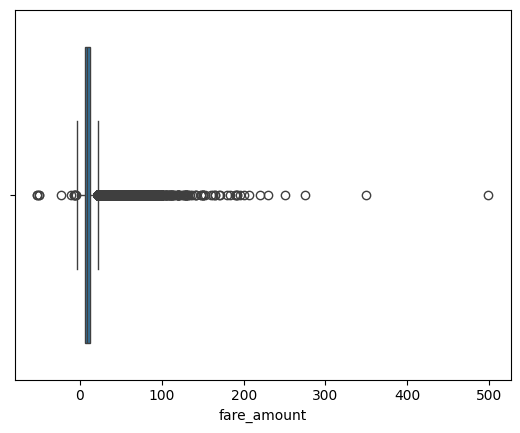

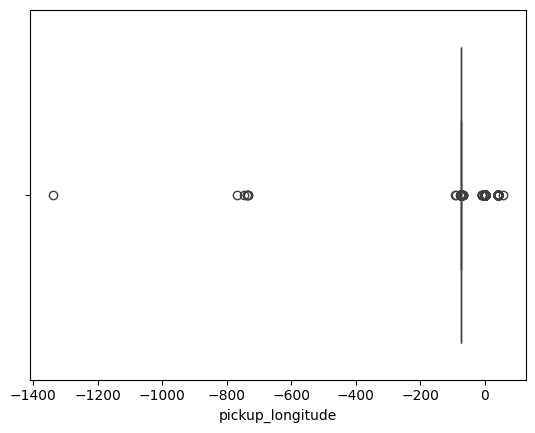

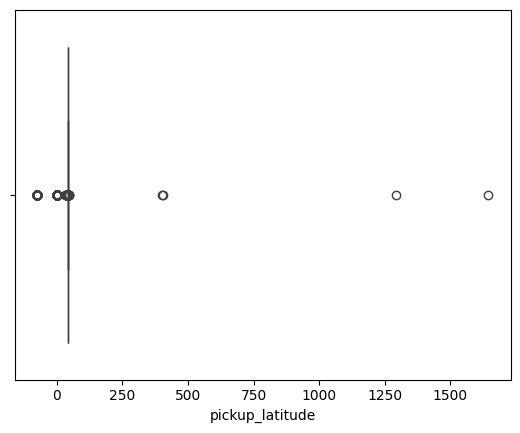

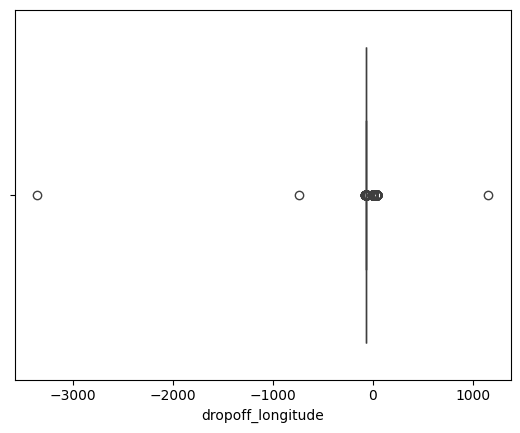

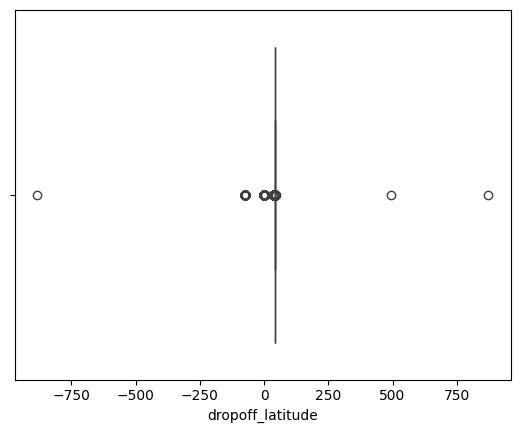

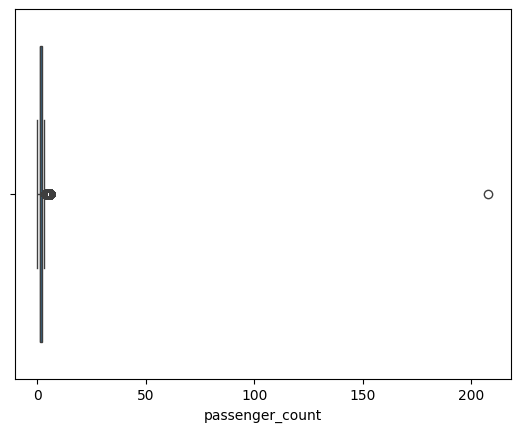

In [67]:
for col in df.select_dtypes(exclude=['object']):
    plt.figure()
    sns.boxplot(data=df,x=col)

In [68]:
df = df[
    (df.pickup_latitude > -90) & (df.pickup_latitude < 90) &
    (df.dropoff_latitude > -90) & (df.dropoff_latitude < 90) &
    (df.pickup_longitude > -180) & (df.pickup_longitude < 180) &
    (df.dropoff_longitude > -180) & (df.dropoff_longitude < 180) & 
    (df.fare_amount > 0) & (df.passenger_count > 0)  & (df.passenger_count < 50)
]

In [69]:
from math import cos, asin, sqrt, pi
import numpy as np

def distance(lat_1,lon_1,lat_2,lon_2):
#     lat1 = row.pickup_latitude
#     lon1 = row.pickup_longitude
#     lat2 = row.dropoff_latitude
#     lon2 = row.dropoff_longitude
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])  #Degrees to Radians
    
    
    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1
    

    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 +  np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon/2.0)**2))
    
    return km

In [70]:
temp = distance(df['pickup_latitude'],df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude'])
temp.head()

0    1.683323
1    2.457590
2    5.036377
3    1.661683
4    4.475450
dtype: float64

In [71]:
df_new = df.copy()
df_new['Distance'] = temp
df = df_new
df.head()

fare_amount          pickup_datetime  pickup_longitude  pickup_latitude  \
0          7.5  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1          7.7  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2         12.9  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3          5.3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4         16.0  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  Distance  
0         -73.999512         40.723217                1  1.683323  
1         -73.994710         40.750325                1  2.457590  
2         -73.962565         40.772647                1  5.036377  
3         -73.965316         40.803349                3  1.661683  
4         -73.973082         40.761247                5  4.475450

<Axes: xlabel='Distance'>

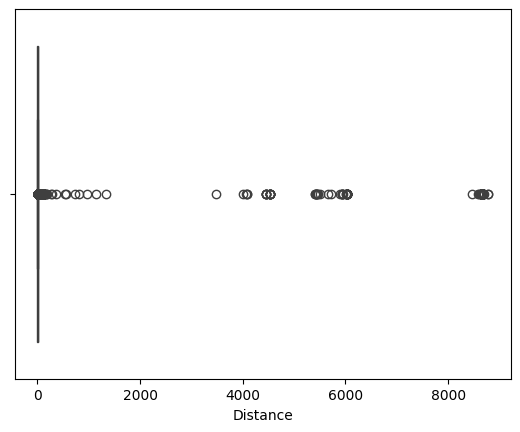

In [72]:
sns.boxplot(data=df,x='Distance')

In [73]:
df = df[(df['Distance'] < 200) & (df['Distance'] > 0)]

In [74]:
df.loc[:, 'pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [76]:
df.loc[:, 'week_day'] = df['pickup_datetime'].dt.day_name()
df.loc[:, 'Year'] = df['pickup_datetime'].dt.year
df.loc[:, 'Month'] = df['pickup_datetime'].dt.month
df.loc[:, 'Hour'] = df['pickup_datetime'].dt.hour

AttributeError: Can only use .dt accessor with datetimelike values

In [77]:
# Drop the specified columns and create a new DataFrame
df = df.drop(columns=['pickup_datetime', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'], errors='ignore')


In [78]:
df.head()

fare_amount  passenger_count  Distance
0          7.5                1  1.683323
1          7.7                1  2.457590
2         12.9                1  5.036377
3          5.3                3  1.661683
4         16.0                5  4.475450

In [79]:
temp = df.copy()

def convert_week_day(day):
    if day in ['Monday','Tuesday','Wednesday','Thursday']:
        return 0 # Weekday
    return 1 # Weekend

def convert_hour(hour):
    if 5 <= hour <= 12:
        return 1
    elif 12 < hour <= 17:
        return 2
    elif 17 < hour < 24:
        return 3
    return 0

df['week_day'] = temp['week_day'].apply(convert_week_day)
df['Hour'] = temp['Hour'].apply(convert_hour)
df.head()

KeyError: 'week_day'

In [93]:
df.corr()

fare_amount  passenger_count  Distance
fare_amount         1.000000         0.011884  0.778667
passenger_count     0.011884         1.000000  0.005112
Distance            0.778667         0.005112  1.000000

<Axes: xlabel='Distance', ylabel='fare_amount'>

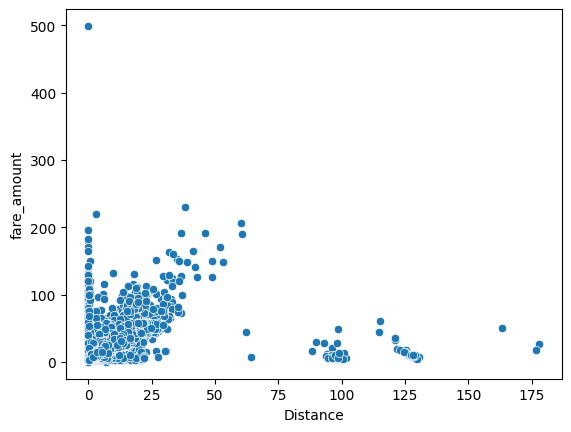

In [81]:
sns.scatterplot(y=df['fare_amount'],x=df['Distance'])

In [82]:
!pip install scikit-learn

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
from sklearn.preprocessing import StandardScaler
x = df[['Distance']].values
y = df['fare_amount'].values.reshape(-1,1)

In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,random_state=10)

In [86]:
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)

In [87]:
x_test = std_x.transform(x_test)

In [88]:
std_y = StandardScaler()
y_train = std_y.fit_transform(y_train)

In [89]:
y_test = std_y.transform(y_test)

In [90]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
def fit_predict(model):
    model.fit(x_train,y_train.ravel())
    y_pred = model.predict(x_test)
    r_squared = r2_score(y_test,y_pred)
    RMSE = mean_squared_error(y_test, y_pred,squared=False)
    MAE = mean_absolute_error(y_test,y_pred)
    print('R-squared: ', r_squared)
    print('RMSE: ', RMSE)
    print("MAE:  ",MAE)

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [92]:
fit_predict(LinearRegression())

R-squared:  0.6041167920841171
RMSE:  0.6290054895695945
MAE:   0.27552329590959806


C:\python 3.10.2\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
